In [27]:
import pandas as pd
import matplotlib.pyplot as plt
movies_df=pd.read_csv('/content/movies.csv',usecols=['movieId','title'],dtype={'movieId':'int32','title':'str'})
movies_df

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [11]:
rating_df=pd.read_csv('/content/ratings.csv',usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})
rating_df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [15]:
df=pd.merge(rating_df,movies_df,on='movieId')
df

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [18]:
combine_movie_rating=df.dropna(axis=0,subset=['title'])
movie_rating_count=combine_movie_rating.groupby(['title'])['rating'].count().reset_index().rename(columns={'rating':'totalratingcount'})[['title','totalratingcount']]

In [19]:
movie_rating_count

,title,totalratingcount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [22]:
rating_withtotalratingcount=combine_movie_rating.merge(movie_rating_count,left_on='title',right_on='title',how='left')
rating_withtotalratingcount

,userId,movieId,rating,title,totalratingcount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),1
100832,610,160527,4.5,Sympathy for the Underdog (1971),1
100833,610,160836,3.0,Hazard (2005),1
100834,610,163937,3.5,Blair Witch (2016),1


In [26]:
rating_withtotalratingcount.describe()

,userId,movieId,rating,totalratingcount
count,100836.000000,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557,58.758777
std,182.618491,35530.987199,1.042529,61.965384
min,1.000000,1.000000,0.500000,1.000000
25%,177.000000,1199.000000,3.000000,13.000000
50%,325.000000,2991.000000,3.500000,39.000000
75%,477.000000,8122.000000,4.000000,84.000000
max,610.000000,193609.000000,5.000000,329.000000


<Axes: >

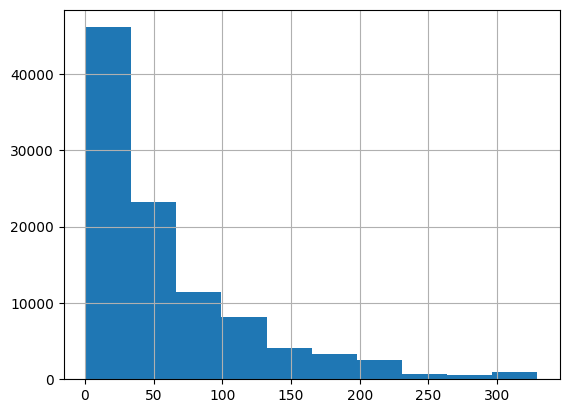

In [29]:
rating_withtotalratingcount['totalratingcount'].hist(bins=10)

In [32]:
popularity_threshold=50
rating_popular_movie=rating_withtotalratingcount.query('totalratingcount>=@popularity_threshold')
rating_popular_movie

,userId,movieId,rating,title,totalratingcount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
79246,603,1997,4.0,"Exorcist, The (1973)",53
79247,606,1997,3.0,"Exorcist, The (1973)",53
79248,607,1997,5.0,"Exorcist, The (1973)",53
79249,608,1997,4.5,"Exorcist, The (1973)",53


In [34]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [35]:
from scipy.sparse import csr_matrix
movie_features_df_matrix=csr_matrix(movie_features_df.values)

In [36]:
movie_features_df_matrix

<450x606 sparse matrix of type '<class 'numpy.float32'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [50]:
import numpy as np
query_index=np.random.choice(movie_features_df.shape[0])
print(query_index)

49


In [47]:
distances,indices=model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [51]:
for i in range(0,len(distances.flatten())):
  if i==0:
    print('Recommendation for {0}:\n'.format(movie_features_df.index[query_index]))
  else:
    print('{0}:{1},with distance of {2}:'.format(i,movie_features_df.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendation for Beetlejuice (1988):

1:Dumb & Dumber (Dumb and Dumber) (1994),with distance of 0.47759777307510376:
2:Happy Gilmore (1996),with distance of 0.5298675298690796:
3:City Slickers II: The Legend of Curly's Gold (1994),with distance of 0.5780321359634399:
4:Ace Ventura: When Nature Calls (1995),with distance of 0.5814144611358643:
5:Ace Ventura: Pet Detective (1994),with distance of 0.597636342048645:
